In [4]:
import numpy as np
import math as mth
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import time 
from vedo import *

In [5]:
def translation(Y, Z):
    # Define the translation matrix
    translation_matrix = np.array([[1.0, 0.0, 0.0, 0.0],
                                   [0.0, 1.0, 0.0, Y],
                                   [0.0, 0.0, 1.0, Z],
                                   [0.0, 0.0, 0.0, 1.0]])
    return translation_matrix

In [10]:
def kinematicStart(phi1, phi2, phi3, phi4):
    L1 = 3
    #Change the L2 to see the full arm movement
    L2 = 60

    L3 = 5
    L4 = 4
    T_01 = np.array([[np.cos(phi1), -np.sin(phi1), 0.0, 0.0],
                     [np.sin(phi1), np.cos(phi1), 0.0, 0.0],
                     [0.0, 0.0, 1.0, 0.0],
                     [0.0, 0.0, 0.0, 1.0]])

    T1_2 = np.array([[np.cos(phi2), -np.sin(phi2), 0.0, 0.0],
                     [np.sin(phi2), np.cos(phi2), 0.0, 0.0],
                     [0.0, 0.0, 1.0, L1],
                     [0.0, 0.0, 0.0, 1.0]])

    T2_3 = np.array([[np.cos(phi3), -np.sin(phi3), 0.0, 0.0],
                     [np.sin(phi3), np.cos(phi3), 0.0, 0.0],
                     [0.0, 0.0, 1.0, L2],
                     [0.0, 0.0, 0.0, 1.0]])

    T3_4 = np.array([[np.cos(phi4), -np.sin(phi4), 0.0, 0.0],
                     [np.sin(phi4), np.cos(phi4), 0.0, 0.0],
                     [0.0, 0.0, 1.0, L3],
                     [0.0, 0.0, 0.0, 1.0]])

    T4_5 = np.array([[1.0, 0.0 ,0.0, 0.0],
                     [0.0, 1.0, 0.0, 0.0],
                     [0.0, 0.0, 1.0, L4],
                     [0.0, 0.0, 0.0, 1.0]])

    #Local to global
    T_02 = T_01 @ T1_2
    T_03 = T_01 @ T1_2 @ T2_3
    T_04 = T_01 @ T1_2 @ T2_3 @ T3_4
    T_05 = T_01 @ T1_2 @ T2_3 @ T3_4 @ T4_5

    # Define the coordinates of first joint and create sphere
    p1 = np.array([0.0, 0.0, 0.0, 1.0])
    p1 = p1[:3]
    s1=Sphere(p1, r=0.5, c='black') 

    # Calculate the global coordinates of joint 2 and create sphere
    j2_local = np.array([0.0, 0.0, L1, 1])
    p2 = T_01 @ j2_local
    p2 = p2[:3]
    s2=Sphere(p2, r=1, c='white') 

    # Calculate the global coordinates of joint 3 and create sphere
    j3_local = np.array([0.0, 0.0, L2, 1])
    p3 = T_02 @ j3_local
    p3 = p3[:3]
    s3=Sphere(p3, r=1, c='white') 

    # Calculate the global coordinates of joint 4 and create sphere
    j4_local = np.array([0.0, 0.0, L3, 1])
    p4 = T_04 @ j4_local
    p4 = p4[:3]
    s4=Sphere(p4, r=1, c='white') 

    # Calculate the global coordinates of joint 5 and create sphere
    j5_local = np.array([0.0, 0.0, L4, 1])
    p5 = T_05 @ j5_local
    p5 = p5[:3]
    s5=Sphere(p5, r=0.5, c='black') 
    
    
    #Create cylinder arms
    c1 = Cylinder(pos=[p1,p2],r=3, axis=(0, 0, 1), cap=True, res=24, c='grey',alpha=1)

    c2 = Cylinder(pos=[p2,p3],r=1, axis=(0, 0, 1), cap=True, res=24, c='grey',alpha=1)

    c3 = Cylinder(pos=[p3,p4],r=1, axis=(0, 0, 1), cap=True, res=24, c='grey',alpha=1)

    c4 = Cylinder(pos=[p4,p5],r=1, axis=(0, 0, 1), cap=True, res=24, c='grey',alpha=1)

    return s1, s2, s3, s4,s5, c1, c2, c3, c4
    

In [12]:
kinematicStart(0.0, np.pi/2, np.pi/4, np.pi/2)


(<Sphere(0x7fe90fa70100) at 0x7fe91185f760>,
 <Sphere(0x7fe91043fdc0) at 0x7fe91185fa60>,
 <Sphere(0x7fe910441fd0) at 0x7fe91185fdc0>,
 <Sphere(0x7fe90fad1ec0) at 0x7fe911863160>,
 <Sphere(0x7fe9104428f0) at 0x7fe911863460>,
 <Cylinder(0x7fe90fad5260) at 0x7fe9118634c0>,
 <Cylinder(0x7fe90fadc240) at 0x7fe9118638e0>,
 <Cylinder(0x7fe90fae06e0) at 0x7fe911863940>,
 <Cylinder(0x7fe90e2f5080) at 0x7fe911863820>)

In [8]:
def kinematicStart(phi1, phi2, phi3, phi4):
    L1 = 3
    L2 = 20
    L3 = 15
    L4 = 10
    T_01 = np.array([[np.cos(phi1), -np.sin(phi1), 0.0, 0.0],
                     [np.sin(phi1), np.cos(phi1), 0.0, 0.0],
                     [0.0, 0.0, 1.0, 0.0],
                     [0.0, 0.0, 0.0, 1.0]])

    T1_2 = np.array([[np.cos(phi1), -np.sin(phi1), 0.0, 0.0],
                     [np.sin(phi1), np.cos(phi1), 0.0, 0.0],
                     [0.0, 0.0, 1.0, L1],
                     [0.0, 0.0, 0.0, 1.0]])

    T2_3 = np.array([[np.cos(phi1), -np.sin(phi1), 0.0, 0.0],
                     [np.sin(phi1), np.cos(phi1), 0.0, 0.0],
                     [0.0, 0.0, 1.0, L2],
                     [0.0, 0.0, 0.0, 1.0]])

    T3_4 = np.array([[np.cos(phi1), -np.sin(phi1), 0.0, 0.0],
                     [np.sin(phi1), np.cos(phi1), 0.0, 0.0],
                     [0.0, 0.0, 1.0, L3],
                     [0.0, 0.0, 0.0, 1.0]])

    T4_5 = np.array([[1.0, 0.0 ,0.0, 0.0],
                     [0.0, 1.0, 0.0, 0.0],
                     [0.0, 0.0, 1.0, L4],
                     [0.0, 0.0, 0.0, 1.0]])

    #Local to global
    T_02 = T_01 @ T1_2
    T_03 = T_01 @ T1_2 @ T2_3
    T_04 = T_01 @ T1_2 @ T2_3 @ T3_4
    T_05 = T_01 @ T1_2 @ T2_3 @ T3_4 @ T4_5

    # Define the coordinates of each joint
    p1 = np.array([0.0, 0.0, 0.0, 1.0])
    p1 = p1[:3]
    s1=Sphere(p1, r=0.5, res=24, quads=False, c='black', alpha=1) 

    # Calculate the global coordinates of joint 2
    j2_local = np.array([0.0, 0.0, L1, 1])
    p2 = T_01 @ j2_local
    p2 = p2[:3]
    s2=Sphere(p2, r=1, res=24, quads=False, c='y', alpha=1) 

    # Calculate the global coordinates of joint 3
    j3_local = np.array([0.0, 0.0, L2, 1])
    p3 = T_02 @ j3_local
    p3 = p3[:3]
    s3=Sphere(p3, r=1, res=24, quads=False, c='y', alpha=1) 

    # Calculate the global coordinates of joint 4
    j4_local = np.array([0.0, 0.0, L3, 1])
    p4 = T_04 @ j3_local
    p4 = p4[:3]
    s4=Sphere(p4, r=1, res=24, quads=False, c='y', alpha=1) 

    # Calculate the global coordinates of joint 5
    j5_local = np.array([0.0, 0.0, L4, 1])
    p5 = T_05 @ j3_local
    p5 = p5[:3]
    s5=Sphere(p5, r=1, res=24, quads=False, c='y', alpha=1) 
    
    #Changes points coorodinates
    sphere = np.array([[0.0],
                     [ 0.0],
                    [1.0],
                     [1.0]])
    
    #Cylinder arms
    c1 = Cylinder(pos=[p1,p2],r=3,height=10, axis=(0, 0, 1), cap=True, res=24, c='grey',alpha=1)

    c2 = Cylinder(pos=[p2,p3],r=1,height=10, axis=(0, 0, 1), cap=True, res=24, c='grey',alpha=1)

    c3 = Cylinder(pos=[p3,p4],r=1,height=10, axis=(0, 0, 1), cap=True, res=24, c='grey',alpha=1)

    c4 = Cylinder(pos=[p4,p5],r=1,height=10, axis=(0, 0, 1), cap=True, res=24, c='grey',alpha=1)

    plt = Plotter(size=(1050, 600))
    plt += [ s1,s2,s3, s4,s5, c1, c2, c3, c4, __doc__]
    plt.background("black", "w").add_global_axes(axtype=1).look_at(plane='xy')
    plt.show().close()

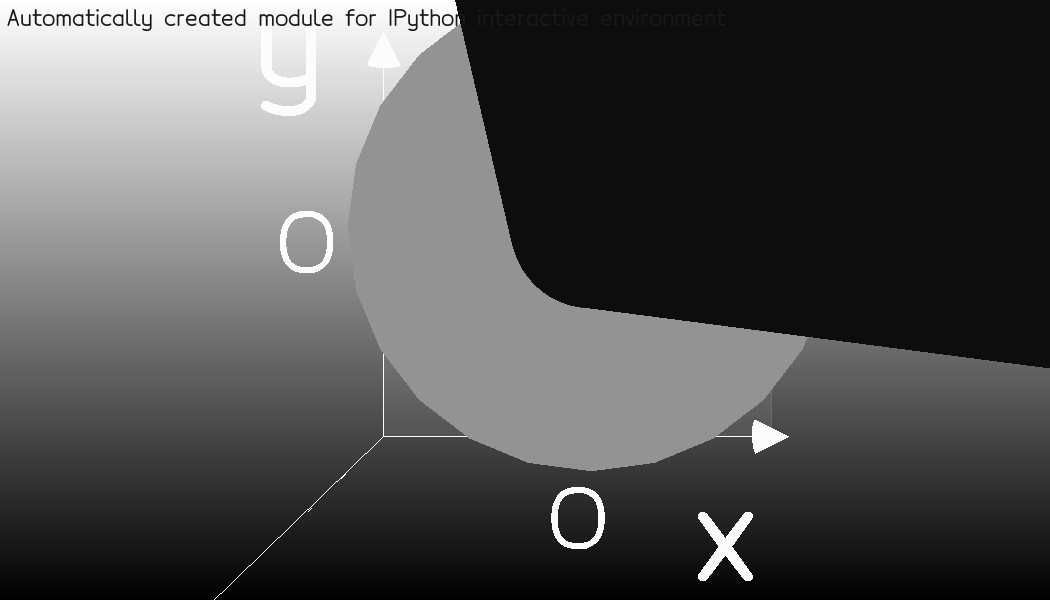

AttributeError: 'NoneType' object has no attribute 'close'

In [9]:
kinematicStart(0.0,0.0,0.0,0.0)